# Baseline Analysis

Here, I will analyze the baseline models. In order to understand the baseline for each genre, I will conduct these analyses on the model for each genre:

1. Genre coherence score comparison.
2. Genre perplexity score comparison.
3. Genre computation time comparison.
4. Topic examination.
5. Word association examination.

In [8]:
# Import packages
from gensim.models import LdaModel
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

# Import data
data = pd.read_csv("../../../data/optimization/sampled/baseline/baseline_performances.csv")
data = data[data['genre'] != "meta"]

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

## Coherence Score Comparison

Coherence is a metric that helps to identify the human interpretability of the topics in a given topic model. For this analysis, I will compare the baseline coherence scores for each of the genres. This will help me to understand how well the vocabulary in different genres can be clustered into topics.

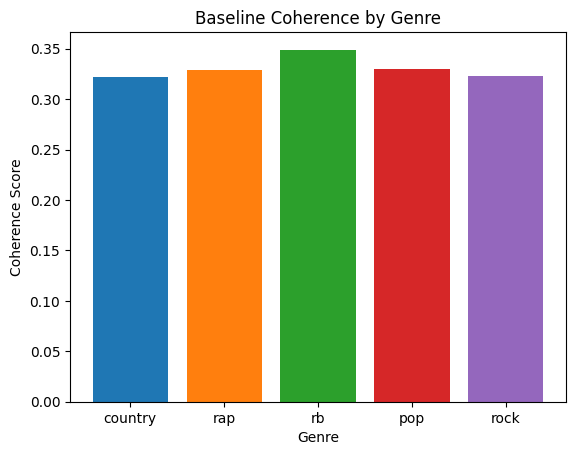

[0.3215738580573807, 0.3286702748067449, 0.3490734737553447, 0.3303374741913333, 0.3226337557240095]


In [9]:
# Get coherence score
coherences = data.coherence.to_list()
genres = data.genre.to_list()


plt.bar(genres, coherences, color=colors)
plt.title("Baseline Coherence by Genre")
plt.xlabel("Genre")
plt.ylabel("Coherence Score")
plt.savefig("../../../data/analysis/sampled/baseline/baseline_coherence.png")
plt.show()
print(coherences)

It's clear that that the baseline for R&B has the highest coherence score. This indicates that it was the easiest genre set to find meaningful topics within, by a fairly large margin. Next is pop, rap, rock and country. This suggests that the R&B dataset has inherently the most distinct topics to capture.

## Perplexity Examination

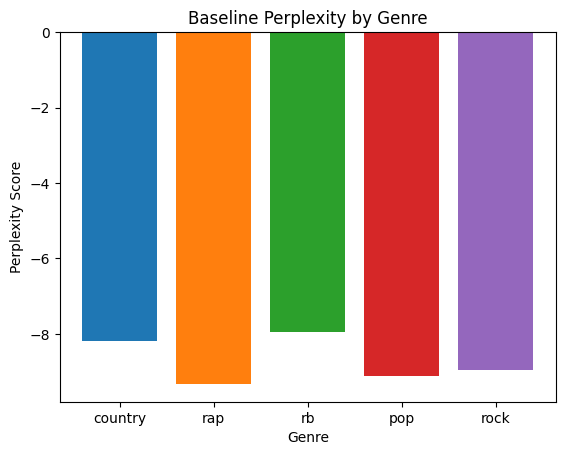

In [10]:
perplexities = data.perplexity.to_list()

plt.bar(genres, perplexities, color=colors)
plt.title("Baseline Perplexity by Genre")
plt.xlabel("Genre")
plt.ylabel("Perplexity Score")
plt.savefig("../../../data/analysis/sampled/baseline/baseline_perplexity.png")
plt.show()

Perplexity scores are relatively consistent across genres, with slight variations. Lower perplexity in genres like R&B aligns with their higher coherence, suggesting these models are better at predicting the distribution of words in unseen documents.

## Computation Time

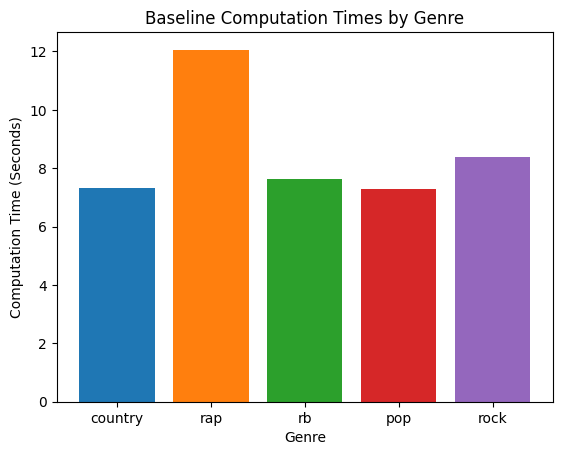

In [11]:
times = data.time.to_list()

plt.bar(genres, times, color=colors)
plt.title("Baseline Computation Times by Genre")
plt.xlabel("Genre")
plt.ylabel("Computation Time (Seconds)")
plt.savefig("../../../data/analysis/sampled/baseline/baseline_computation_time.png")
plt.show()

Rap has substantially higher computation time than the other genres. Given that the genres are approximately the same in length, it would appear the the vocabulary for rap music is far more complex than the rest of the genres. Pop has the least apparent complexity.

## Topic Examination

To understand the quality of the topics, I will examine the top four topics for each genre of music in word clouds. This will help me to be able to understand the actual human interpretability of the topics the models have clustered together.

NUM country TOPICS: 4
NUM rap TOPICS: 4
NUM rb TOPICS: 4
NUM pop TOPICS: 4
NUM rock TOPICS: 4
4
[{'genre': 'country', 'topic': 4, 'word': 'heart', 'frequency': 0.041329898}, {'genre': 'country', 'topic': 4, 'word': 'everything', 'frequency': 0.032908127}, {'genre': 'country', 'topic': 4, 'word': 'life', 'frequency': 0.027139476}, {'genre': 'country', 'topic': 4, 'word': 'girl', 'frequency': 0.020495374}, {'genre': 'country', 'topic': 4, 'word': 'eye', 'frequency': 0.014769488}, {'genre': 'country', 'topic': 4, 'word': 'love', 'frequency': 0.013590065}, {'genre': 'country', 'topic': 4, 'word': 'time', 'frequency': 0.013349692}, {'genre': 'country', 'topic': 4, 'word': 'way', 'frequency': 0.012557274}, {'genre': 'country', 'topic': 4, 'word': 'thing', 'frequency': 0.011182407}, {'genre': 'country', 'topic': 4, 'word': 'day', 'frequency': 0.0103238635}, {'genre': 'country', 'topic': 4, 'word': 'come', 'frequency': 0.009802459}, {'genre': 'country', 'topic': 4, 'word': 'night', 'frequency'

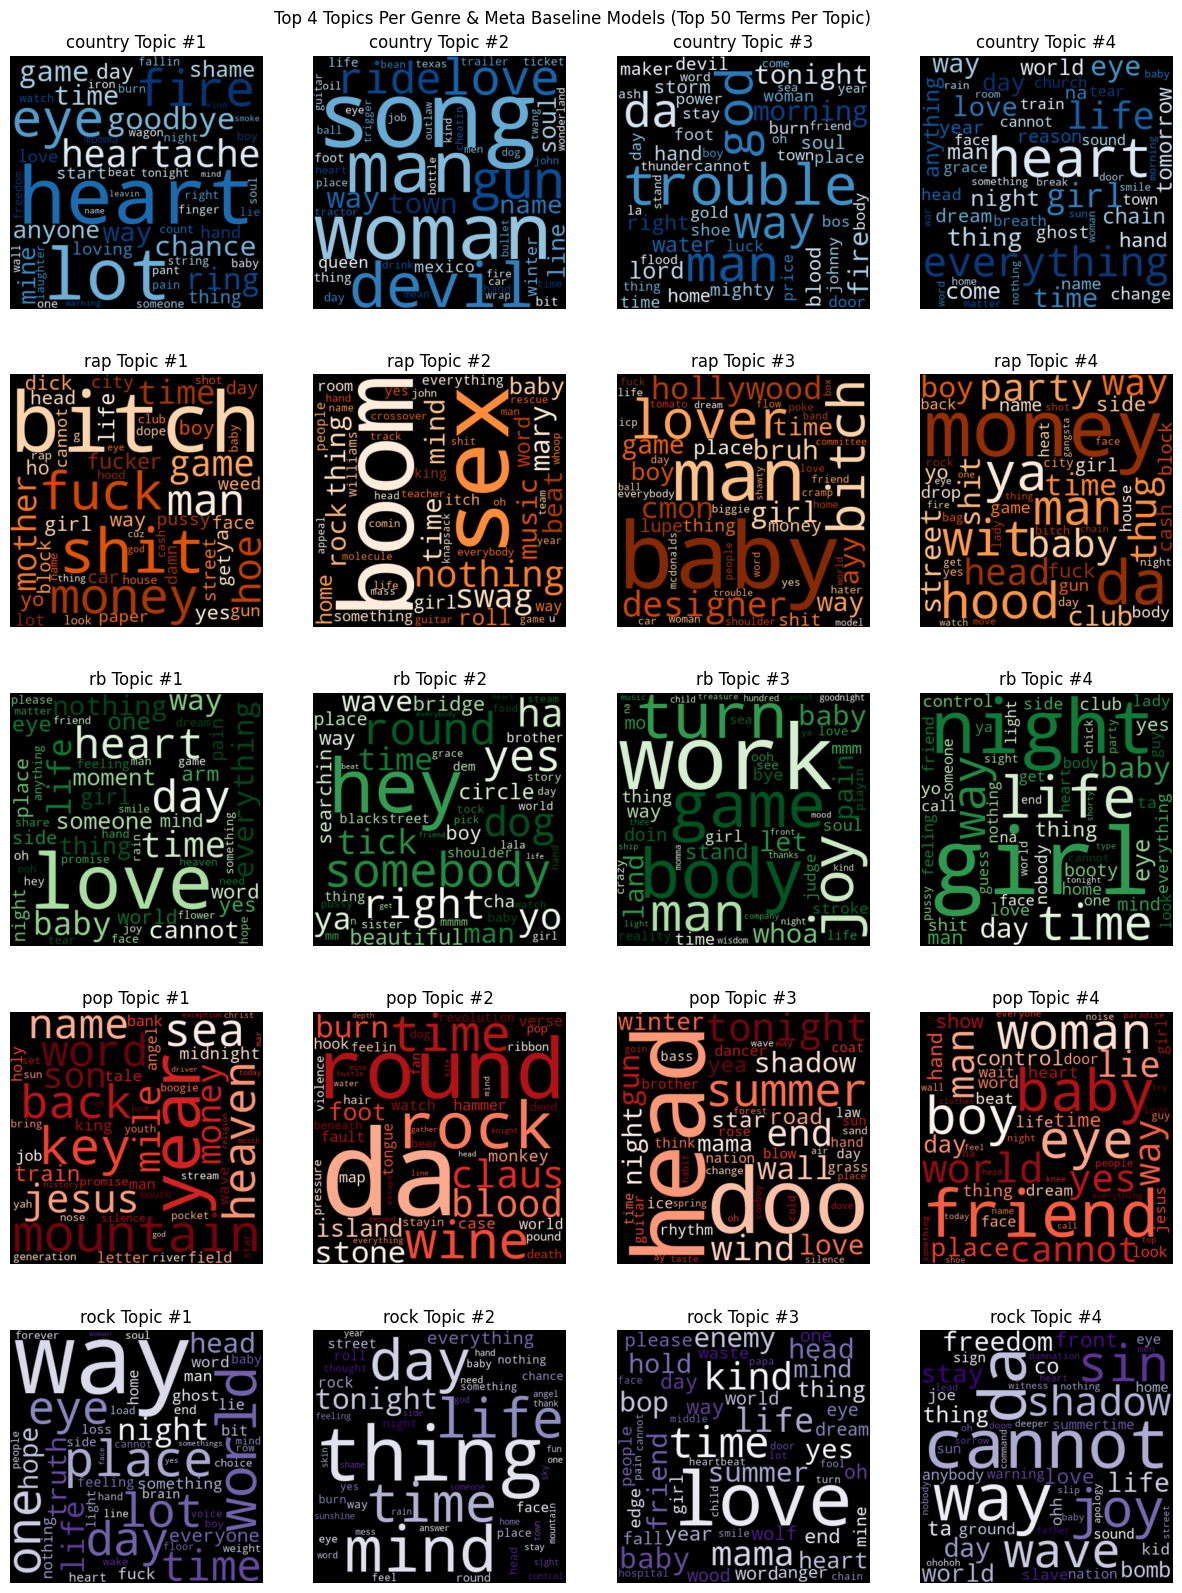

In [15]:
# Load models
# meta_model = LdaModel.load("../../../models/sampled/baseline/meta_baseline.model")
country_model = LdaModel.load("../../../models/sampled/baseline/country_baseline.model")
rap_model = LdaModel.load("../../../models/sampled/baseline/rap_baseline.model")
rb_model = LdaModel.load("../../../models/sampled/baseline/rb_baseline.model")
pop_model = LdaModel.load("../../../models/sampled/baseline/pop_baseline.model")
rock_model = LdaModel.load("../../../models/sampled/baseline/rock_baseline.model")

# Get topics
# meta_topics = meta_model.show_topics(num_topics=4, num_words=50, formatted=False)
country_topics = country_model.show_topics(num_topics=4, num_words=50, formatted=False)
rap_topics = rap_model.show_topics(num_topics=4, num_words=50, formatted=False)
rb_topics = rb_model.show_topics(num_topics=4, num_words=50, formatted=False)
pop_topics = pop_model.show_topics(num_topics=4, num_words=50, formatted=False)
rock_topics = rock_model.show_topics(num_topics=4, num_words=50, formatted=False)

# Make word clouds

fig, axes = plt.subplots(5, 4, figsize=(15, 5 * 4))

topics = []
colors = ['Blues', 'Oranges', 'Greens', 'Reds', 'Purples']

def get_topics(genre, genre_topics, row):
    print(f"NUM {genre} TOPICS: {len(genre_topics)}")
    for i, topic in enumerate(genre_topics):
        dict_words = dict(topic[1])

        wordcloud = WordCloud(width=400, height=400, 
                            background_color='black',
                            colormap=colors[row], 
                            min_font_size=10).generate_from_frequencies(dict_words)
        
        axes[row, i].imshow(wordcloud, interpolation='bilinear')
        axes[row, i].axis("off")
        axes[row, i].set_title(f"{genre} Topic #{i+1}")
        
    return [{'genre': genre, 'topic': i+1, 'word': word, "frequency": freq} for word, freq in topic[1]]

# topics.extend(get_topics("meta", meta_topics, 0))
topics.extend(get_topics("country", country_topics, 0))
topics.extend(get_topics("rap", rap_topics, 1))
topics.extend(get_topics("rb", rb_topics, 2))
topics.extend(get_topics("pop", pop_topics, 3))
topics.extend(get_topics("rock", rock_topics, 4))
print(len(topics[0]))
print(topics)
fig.suptitle("Top 4 Topics Per Genre & Meta Baseline Models (Top 50 Terms Per Topic)", y=0.9)
plt.savefig("../../../data/analysis/sampled/baseline/baseline_genre_topics.png")
plt.show()

So far, all of the genres appear quite noisy in terms of associated words within each topic. There are words within each that do not appear to have much of a relation to the other words.

## Recommendations for Hyperparameter Tuning

1. **Focus on Genre-Specific Tuning**:
    - Given the variation in coherence and perplexity scores by genre, consider tuning the LDA models separately for each genre. This approach allows for customizing hyperparameters to the specific linguistic and thematic characteristics of each genre.
2. **Identify hyperparemeters to tune**:
    - Based on coherence, perplexity and computational time, understand how each hyperparameter effects each of these metrics, for each genre.
    - From this, identify the search space dimensions (hyperparameters) to optimize each LdaModel with.
3. **Leverage Advanced Techniques**:
    - Consider implementing more sophisticated optimization techniques such as Bayesian optimization for hyperparameter tuning, which can efficiently navigate the hyperparameter space based on model performance metrics. This will save time in the optimization process, particularly in circumstances where the model takes longer to train.
4. **Validation and Cross-Validation**:
    - Implement cross-validation techniques to validate the robustness of the chosen hyperparameters across different subsets of your data, ensuring that the model's performance is stable and reliable.

Given this analysis, I will next train and conduct analysis on each genre for a broad search area, to help understand how each hyperparameter of interest affects the coherence, perplexity and computational time of the model training. From this I can decide the most appropriate set of hyperparmeters to optimize for each genre.